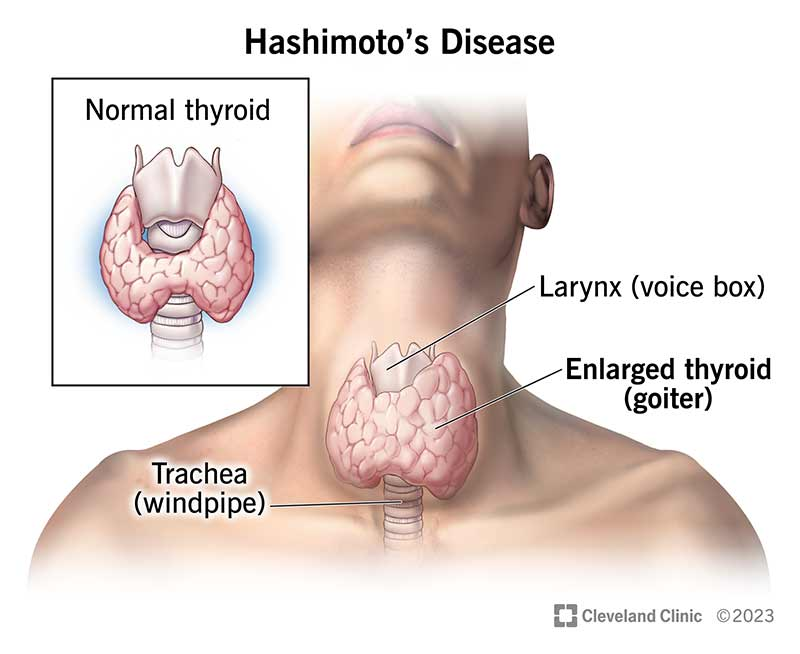

<div style="border-radius:10px; padding: 15px; background-color: #e6cfac; font-size:120%; text-align:left">

<h3 align="left"><font color=#524712>Target:</font></h3>

<h8 align="left"><font color=#524712>Hashimoto's is a dangerous disease that is more common in women. If it is not diagnosed and treated early, this disease can lead to cancer and death! We want to use machine learning to detect this disease early in patients' bodies.</font></h8>
    
*
**Completing this project will:**
--
*
* **Early detection of Hashimoto's disease:** By developing a system that utilizes machine learning and artificial intelligence algorithms to detect Hashimoto's disease early in patients, faster and more accurate identification of the disease becomes possible. This translates to earlier initiation of treatment, reduced risks, and increased chances of disease remission.
*
* **Increased awareness and education:** This project will lead to the dissemination of more information about Hashimoto's disease and its symptoms within the community. This can increase public awareness and educate people about the disease. Increased awareness will help people recognize early symptoms and seek medical attention promptly.
*
* **Reduced prevalence and mortality:** With early detection of Hashimoto's disease and timely initiation of treatment, the prevalence and mortality rates associated with the disease will be reduced. This can lead to improved health and reduced disease burden in society.
*
* **Improved quality of life:** Early detection of Hashimoto's disease and proper treatment enable individuals with the disease to manage their symptoms and improve their quality of life. This includes reducing fatigue, improving depression, managing weight, and enhancing cognitive function.
*
* **Advancement in research and clinical studies:** The implementation of this project can lead to advancements in research and clinical studies related to Hashimoto's disease. The data collected through this project can contribute to further analysis of the causes, risk factors, and therapeutic pathways involved in the disease, ultimately leading to improved treatment and management of Hashimoto's disease.
*    
          We hope that we can successfully accomplish this project by utilizing machine learning models.

<a id="import"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 1: Import Libraries</p>

⬆️[Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from scipy import stats
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score , confusion_matrix
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler ,label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

<a id="read"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 2: Read Dataset</p>

⬆️[Tabel of Contents](#contents_tabel)

In [2]:
data=pd.read_excel("D:/shinetech/hashimoto.xlsx")
data.head()
#نتایج آزمایشات هورمون‌های تیروئیدی انجام شده بر روی نمونه سرم بیماران هاشیموتو

,ردیف,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,NaN,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,1,100,ND,37.3,4.6,6
2,2,1.46,ND,43.6,4.1,15.4
3,3,2.42,ND,46.3,3.9,8.5
4,4,0.04,130.2,52.3,4.4,12.6


In [3]:
data2=pd.read_excel("D:/shinetech/qeyrtovaymion.xlsx")
data2.head()
# نتایج آزمایشات هورمون‌های تیروئیدی انجام شده بر روی نمونه سرم بیماران تیروئیدی غیراتوایمیون

,ردیف,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,NaN,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,1,0.09,ND,22.1,4,11.2
2,2,5.64,ND,46.3,4.3,13.4
3,3,0.04,ND,32,6.1,16.6
4,4,0.17,ND,10.8,5.1,14.5


In [4]:
data3=pd.read_excel("D:/shinetech/euthyroidism or normal.xlsx")
data3.head()
# نتایج آزمایشات هورمونی افرادی که euthyroidism یا نرمال تشخیص داده شدند.

,ردیف,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,NaN,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,1.0,2.76,ND,4.84,5,2.76
2,2.0,2.98,ND,4.53,4.3,2.98
3,3.0,2.15,ND,9.1,4.1,2.15
4,4.0,3.18,ND,4,7.2,3.18


In [5]:
data5=pd.read_excel("D:/shinetech/Book1.xlsx")
data5.head()
# جدول بررسی دیتای هاشیموتو و بررسی ویروس

,ردیف,HHV-6 A 20/µL,Anti-TPO titer,TSH,FT3,FT4,Disease
0,1.0,147.0,100.4,4.09,4.6,8.2,هاشیموتو
1,2.0,244.0,432.6,4.54,4.2,9.2,هاشیموتو
2,3.0,448.0,600<,110.00,4.7,8.2,هاشیموتو
3,4.0,510.0,530.1,1.82,4.0,15.8,هاشیموتو
4,5.0,179.0,152.8,4.09,4.6,8.2,هاشیموتو


<a id="overview"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 3: Data Analysis and Preprocessing</p>

⬆️[Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #e6cfac; font-size:110%; text-align:left">

<h2 align="left"><font color=#524712>This part of the project involves the following actions:</font></h2> 

   - **1. Numerical analysis**

   - **2. Removal of columns, rows, and Anti_tg**
    
   - **3. Handling missing values**
    
   - **4. Removing the first row**
    
   - **5. Converting data types from object to floats**
    
   - **6. Adding a new column named HHV_6**
    
   - **All of these actions were performed on every 4 data**
   

In [6]:
data_hashimoto=data.iloc[:,1:]

In [7]:
data_hashimoto.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,100,ND,37.3,4.6,6
2,1.46,ND,43.6,4.1,15.4
3,2.42,ND,46.3,3.9,8.5
4,0.04,130.2,52.3,4.4,12.6


In [8]:
data_hashimoto1=data_hashimoto.drop(0,axis=0)
data_hashimoto1.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,100,ND,37.3,4.6,6
2,1.46,ND,43.6,4.1,15.4
3,2.42,ND,46.3,3.9,8.5
4,0.04,130.2,52.3,4.4,12.6
5,4.3,ND,54.6,4.4,5.6


In [9]:
data_hashimoto2=data_hashimoto1.drop(61,axis=0)
data_hashimoto2.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,100,ND,37.3,4.6,6
2,1.46,ND,43.6,4.1,15.4
3,2.42,ND,46.3,3.9,8.5
4,0.04,130.2,52.3,4.4,12.6
5,4.3,ND,54.6,4.4,5.6


In [10]:
data_hashimoto3=data_hashimoto2.iloc[:48,:]
data_hashimoto3.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,100,ND,37.3,4.6,6
2,1.46,ND,43.6,4.1,15.4
3,2.42,ND,46.3,3.9,8.5
4,0.04,130.2,52.3,4.4,12.6
5,4.3,ND,54.6,4.4,5.6


In [11]:
data_hashimoto4=data_hashimoto3.drop('Anti-Tg',axis=1)
data_hashimoto4.head()

,TSH,Anti TPO,FT3,FT4
1,100,37.3,4.6,6
2,1.46,43.6,4.1,15.4
3,2.42,46.3,3.9,8.5
4,0.04,52.3,4.4,12.6
5,4.3,54.6,4.4,5.6


In [12]:
data_hashimoto4.reset_index()

,index,TSH,Anti TPO,FT3,FT4
0,1,100,37.3,4.6,6
1,2,1.46,43.6,4.1,15.4
2,3,2.42,46.3,3.9,8.5
3,4,0.04,52.3,4.4,12.6
4,5,4.3,54.6,4.4,5.6
5,6,150,56.6,4.4,9.1
6,7,120,58.8,5.1,4.7
7,8,200,74.2,4,4.7
8,9,3.2,78,4.6,15.7
9,10,2.4,83.2,4.6,13.2


In [13]:
seri=pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],name="HHV-6")
seri

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
Name: HHV-6, dtype: int64

In [14]:
data_hashimoto4.insert(1,'HHV-6',seri)
data_hashimoto4.head()

,TSH,HHV-6,Anti TPO,FT3,FT4
1,100,0,37.3,4.6,6
2,1.46,0,43.6,4.1,15.4
3,2.42,0,46.3,3.9,8.5
4,0.04,0,52.3,4.4,12.6
5,4.3,0,54.6,4.4,5.6


In [15]:
data_hashimoto4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 1 to 48
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TSH       48 non-null     object
 1   HHV-6     48 non-null     int64 
 2   Anti TPO  48 non-null     object
 3   FT3       48 non-null     object
 4   FT4       48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [16]:
data_hashimoto5=data_hashimoto4.astype(float)
data_hashimoto5.head()

,TSH,HHV-6,Anti TPO,FT3,FT4
1,100.00,0.0,37.3,4.6,6.0
2,1.46,0.0,43.6,4.1,15.4
3,2.42,0.0,46.3,3.9,8.5
4,0.04,0.0,52.3,4.4,12.6
5,4.30,0.0,54.6,4.4,5.6


In [17]:
data2.head()

,ردیف,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,NaN,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,1,0.09,ND,22.1,4,11.2
2,2,5.64,ND,46.3,4.3,13.4
3,3,0.04,ND,32,6.1,16.6
4,4,0.17,ND,10.8,5.1,14.5


In [18]:
data3=data2.iloc[:,1:]
data3.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,0.09,ND,22.1,4,11.2
2,5.64,ND,46.3,4.3,13.4
3,0.04,ND,32,6.1,16.6
4,0.17,ND,10.8,5.1,14.5


In [19]:
data_qeyrtovaymion=data3.drop(0,axis=0)
data_qeyrtovaymion.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,0.09,ND,22.1,4,11.2
2,5.64,ND,46.3,4.3,13.4
3,0.04,ND,32,6.1,16.6
4,0.17,ND,10.8,5.1,14.5
5,0.03,ND,18.8,4,16.5


In [20]:
data_qeyrtovaymion2=data_qeyrtovaymion.drop(61,axis=0)
data_qeyrtovaymion2.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,0.09,ND,22.1,4,11.2
2,5.64,ND,46.3,4.3,13.4
3,0.04,ND,32,6.1,16.6
4,0.17,ND,10.8,5.1,14.5
5,0.03,ND,18.8,4,16.5


In [21]:
data_qeyrtovaymion3=data_qeyrtovaymion2.drop('Anti-Tg',axis=1)
data_qeyrtovaymion3.head()

,TSH,Anti TPO,FT3,FT4
1,0.09,22.1,4,11.2
2,5.64,46.3,4.3,13.4
3,0.04,32,6.1,16.6
4,0.17,10.8,5.1,14.5
5,0.03,18.8,4,16.5


In [22]:
columns=np.full((60),0,float)
columns

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
data_qeyrtovaymion3.insert(1,'HHV-6',columns)

In [24]:
data_qeyrtovaymion3.head()

,TSH,HHV-6,Anti TPO,FT3,FT4
1,0.09,0.0,22.1,4,11.2
2,5.64,0.0,46.3,4.3,13.4
3,0.04,0.0,32,6.1,16.6
4,0.17,0.0,10.8,5.1,14.5
5,0.03,0.0,18.8,4,16.5


In [25]:
data_qeyrtovaymion3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TSH       60 non-null     object 
 1   HHV-6     60 non-null     float64
 2   Anti TPO  60 non-null     object 
 3   FT3       60 non-null     object 
 4   FT4       60 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


In [26]:
data_qeyrtovaymion4=data_qeyrtovaymion3.astype(float)

In [27]:
data_qeyrtovaymion4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TSH       60 non-null     float64
 1   HHV-6     60 non-null     float64
 2   Anti TPO  60 non-null     float64
 3   FT3       60 non-null     float64
 4   FT4       60 non-null     float64
dtypes: float64(5)
memory usage: 2.5 KB


In [28]:
data3=pd.read_excel("D:/shinetech/euthyroidism or normal.xlsx")

In [29]:
data3

,ردیف,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,NaN,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,1.0,2.76,ND,4.84,5,2.76
2,2.0,2.98,ND,4.53,4.3,2.98
3,3.0,2.15,ND,9.1,4.1,2.15
4,4.0,3.18,ND,4,7.2,3.18
5,5.0,2.09,ND,3.9,4.9,2.09
6,6.0,1.64,ND,7,4,1.64
7,7.0,2.85,ND,6.5,4.1,2.85
8,8.0,3.07,ND,5.5,5,3.07
9,9.0,0.33,ND,1,4.2,0.33


In [30]:
data4=data3.iloc[:,1:]
data4.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
0,(0.3-5.3µIU/ml),(<60 U/ml),(<35 U/ml),(1.9-5.7 pmole/L),(10-22 pmole/L)
1,2.76,ND,4.84,5,2.76
2,2.98,ND,4.53,4.3,2.98
3,2.15,ND,9.1,4.1,2.15
4,3.18,ND,4,7.2,3.18


In [31]:
data_euthyroidism_normal=data4.drop(0,axis=0)
data_euthyroidism_normal.head()

,TSH,Anti-Tg,Anti TPO,FT3,FT4
1,2.76,ND,4.84,5,2.76
2,2.98,ND,4.53,4.3,2.98
3,2.15,ND,9.1,4.1,2.15
4,3.18,ND,4,7.2,3.18
5,2.09,ND,3.9,4.9,2.09


In [32]:
data_euthyroidism_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TSH       30 non-null     object
 1   Anti-Tg   30 non-null     object
 2   Anti TPO  30 non-null     object
 3   FT3       30 non-null     object
 4   FT4       30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [33]:
data_euthyroidism_normal2=data_euthyroidism_normal.drop('Anti-Tg',axis=1)

In [34]:
data_euthyroidism_normal2.head()

,TSH,Anti TPO,FT3,FT4
1,2.76,4.84,5,2.76
2,2.98,4.53,4.3,2.98
3,2.15,9.1,4.1,2.15
4,3.18,4,7.2,3.18
5,2.09,3.9,4.9,2.09


In [35]:
columns=np.full((30),0,float)
columns

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
data_euthyroidism_normal2.insert(1,'HHV-6',columns)

In [37]:
data_euthyroidism_normal2.head()

,TSH,HHV-6,Anti TPO,FT3,FT4
1,2.76,0.0,4.84,5,2.76
2,2.98,0.0,4.53,4.3,2.98
3,2.15,0.0,9.1,4.1,2.15
4,3.18,0.0,4,7.2,3.18
5,2.09,0.0,3.9,4.9,2.09


In [38]:
data_euthyroidism_normal2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TSH       30 non-null     object 
 1   HHV-6     30 non-null     float64
 2   Anti TPO  30 non-null     object 
 3   FT3       30 non-null     object 
 4   FT4       30 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [39]:
data_euthyroidism_normal3=data_euthyroidism_normal2.astype(float)

In [40]:
data_euthyroidism_normal3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TSH       30 non-null     float64
 1   HHV-6     30 non-null     float64
 2   Anti TPO  30 non-null     float64
 3   FT3       30 non-null     float64
 4   FT4       30 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [41]:
data5

,ردیف,HHV-6 A 20/µL,Anti-TPO titer,TSH,FT3,FT4,Disease
0,1.0,147.0,100.4,4.09,4.6,8.2,هاشیموتو
1,2.0,244.0,432.6,4.54,4.2,9.2,هاشیموتو
2,3.0,448.0,600<,110.00,4.7,8.2,هاشیموتو
3,4.0,510.0,530.1,1.82,4.0,15.8,هاشیموتو
4,5.0,179.0,152.8,4.09,4.6,8.2,هاشیموتو
5,6.0,549.0,600<,4.64,4.4,8.0,هاشیموتو
6,7.0,346.0,324.5,140.00,2.9,7.5,هاشیموتو
7,8.0,411.0,409.6,1.67,5.0,9.4,هاشیموتو
8,9.0,335.0,283.5,2.98,4.9,12.0,هاشیموتو
9,10.0,166.0,216.3,2.57,3.8,11.9,هاشیموتو


In [42]:
data6=data5.iloc[:,1:6]
data6.head()

,HHV-6 A 20/µL,Anti-TPO titer,TSH,FT3,FT4
0,147.0,100.4,4.09,4.6,8.2
1,244.0,432.6,4.54,4.2,9.2
2,448.0,600<,110.00,4.7,8.2
3,510.0,530.1,1.82,4.0,15.8
4,179.0,152.8,4.09,4.6,8.2


In [43]:
data7=data6.drop([2,5,14,18],axis=0)

In [44]:
data7['Anti-TPO titer']=data7['Anti-TPO titer'].astype(float)

In [45]:
data7.head()

,HHV-6 A 20/µL,Anti-TPO titer,TSH,FT3,FT4
0,147.0,100.4,4.09,4.6,8.2
1,244.0,432.6,4.54,4.2,9.2
3,510.0,530.1,1.82,4.0,15.8
4,179.0,152.8,4.09,4.6,8.2
6,346.0,324.5,140.00,2.9,7.5


In [46]:
data8=data7.drop('HHV-6 A 20/µL',axis=1)

In [47]:
data8.head()

,Anti-TPO titer,TSH,FT3,FT4
0,100.4,4.09,4.6,8.2
1,432.6,4.54,4.2,9.2
3,530.1,1.82,4.0,15.8
4,152.8,4.09,4.6,8.2
6,324.5,140.00,2.9,7.5


In [48]:
data9 = data8.loc[:, ['TSH', 'Anti-TPO titer', 'FT3','FT4']]

In [49]:
data9.head()

,TSH,Anti-TPO titer,FT3,FT4
0,4.09,100.4,4.6,8.2
1,4.54,432.6,4.2,9.2
3,1.82,530.1,4.0,15.8
4,4.09,152.8,4.6,8.2
6,140.00,324.5,2.9,7.5


In [50]:
data10 = data9.rename(columns={'Anti-TPO titer': 'Anti TPO'})
data10.head()

,TSH,Anti TPO,FT3,FT4
0,4.09,100.4,4.6,8.2
1,4.54,432.6,4.2,9.2
3,1.82,530.1,4.0,15.8
4,4.09,152.8,4.6,8.2
6,140.00,324.5,2.9,7.5


In [51]:
seri=pd.Series([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],name="HHV-6")
seri

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    0
23    0
24    0
Name: HHV-6, dtype: int64

In [52]:
data10.insert(1,'HHV-6',seri)

In [53]:
data10.head()

,TSH,HHV-6,Anti TPO,FT3,FT4
0,4.09,1,100.4,4.6,8.2
1,4.54,1,432.6,4.2,9.2
3,1.82,1,530.1,4.0,15.8
4,4.09,1,152.8,4.6,8.2
6,140.00,1,324.5,2.9,7.5


In [54]:
df = pd.concat([data10,data_euthyroidism_normal3,data_qeyrtovaymion4,data_hashimoto5], axis=0)

In [55]:
df

,TSH,HHV-6,Anti TPO,FT3,FT4
0,4.09,1.0,100.4,4.6,8.2
1,4.54,1.0,432.6,4.2,9.2
3,1.82,1.0,530.1,4.0,15.8
4,4.09,1.0,152.8,4.6,8.2
6,140.00,1.0,324.5,2.9,7.5
...,...,...,...,...,...
44,3.47,1.0,482.8,4.3,7.1
45,5.67,1.0,499.9,4.1,8.0
46,1.82,1.0,530.1,4.0,15.8
47,2.78,1.0,569.2,4.4,14.6


In [56]:
df=df.reset_index()

In [57]:
df=df.iloc[:,1:]

In [58]:
df

,TSH,HHV-6,Anti TPO,FT3,FT4
0,4.09,1.0,100.4,4.6,8.2
1,4.54,1.0,432.6,4.2,9.2
2,1.82,1.0,530.1,4.0,15.8
3,4.09,1.0,152.8,4.6,8.2
4,140.00,1.0,324.5,2.9,7.5
...,...,...,...,...,...
154,3.47,1.0,482.8,4.3,7.1
155,5.67,1.0,499.9,4.1,8.0
156,1.82,1.0,530.1,4.0,15.8
157,2.78,1.0,569.2,4.4,14.6


In [59]:
df.describe()

,TSH,HHV-6,Anti TPO,FT3,FT4
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,19.370943,0.345912,112.346981,7.227044,11.730063
std,44.489851,0.477168,156.715089,32.079178,4.636233
min,0.010000,0.000000,0.300000,2.700000,0.330000
25%,0.635000,0.000000,4.700000,4.100000,8.200000
50%,3.070000,0.000000,18.800000,4.400000,12.900000
75%,5.910000,1.000000,192.200000,5.000000,15.700000
max,200.000000,1.000000,594.000000,409.000000,18.200000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TSH       159 non-null    float64
 1   HHV-6     159 non-null    float64
 2   Anti TPO  159 non-null    float64
 3   FT3       159 non-null    float64
 4   FT4       159 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


<a id="eda"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 4: Exploratory Data Analysis (EDA)</p>

⬆️[Tabel of Contents](#contents_tabel)

Target
---

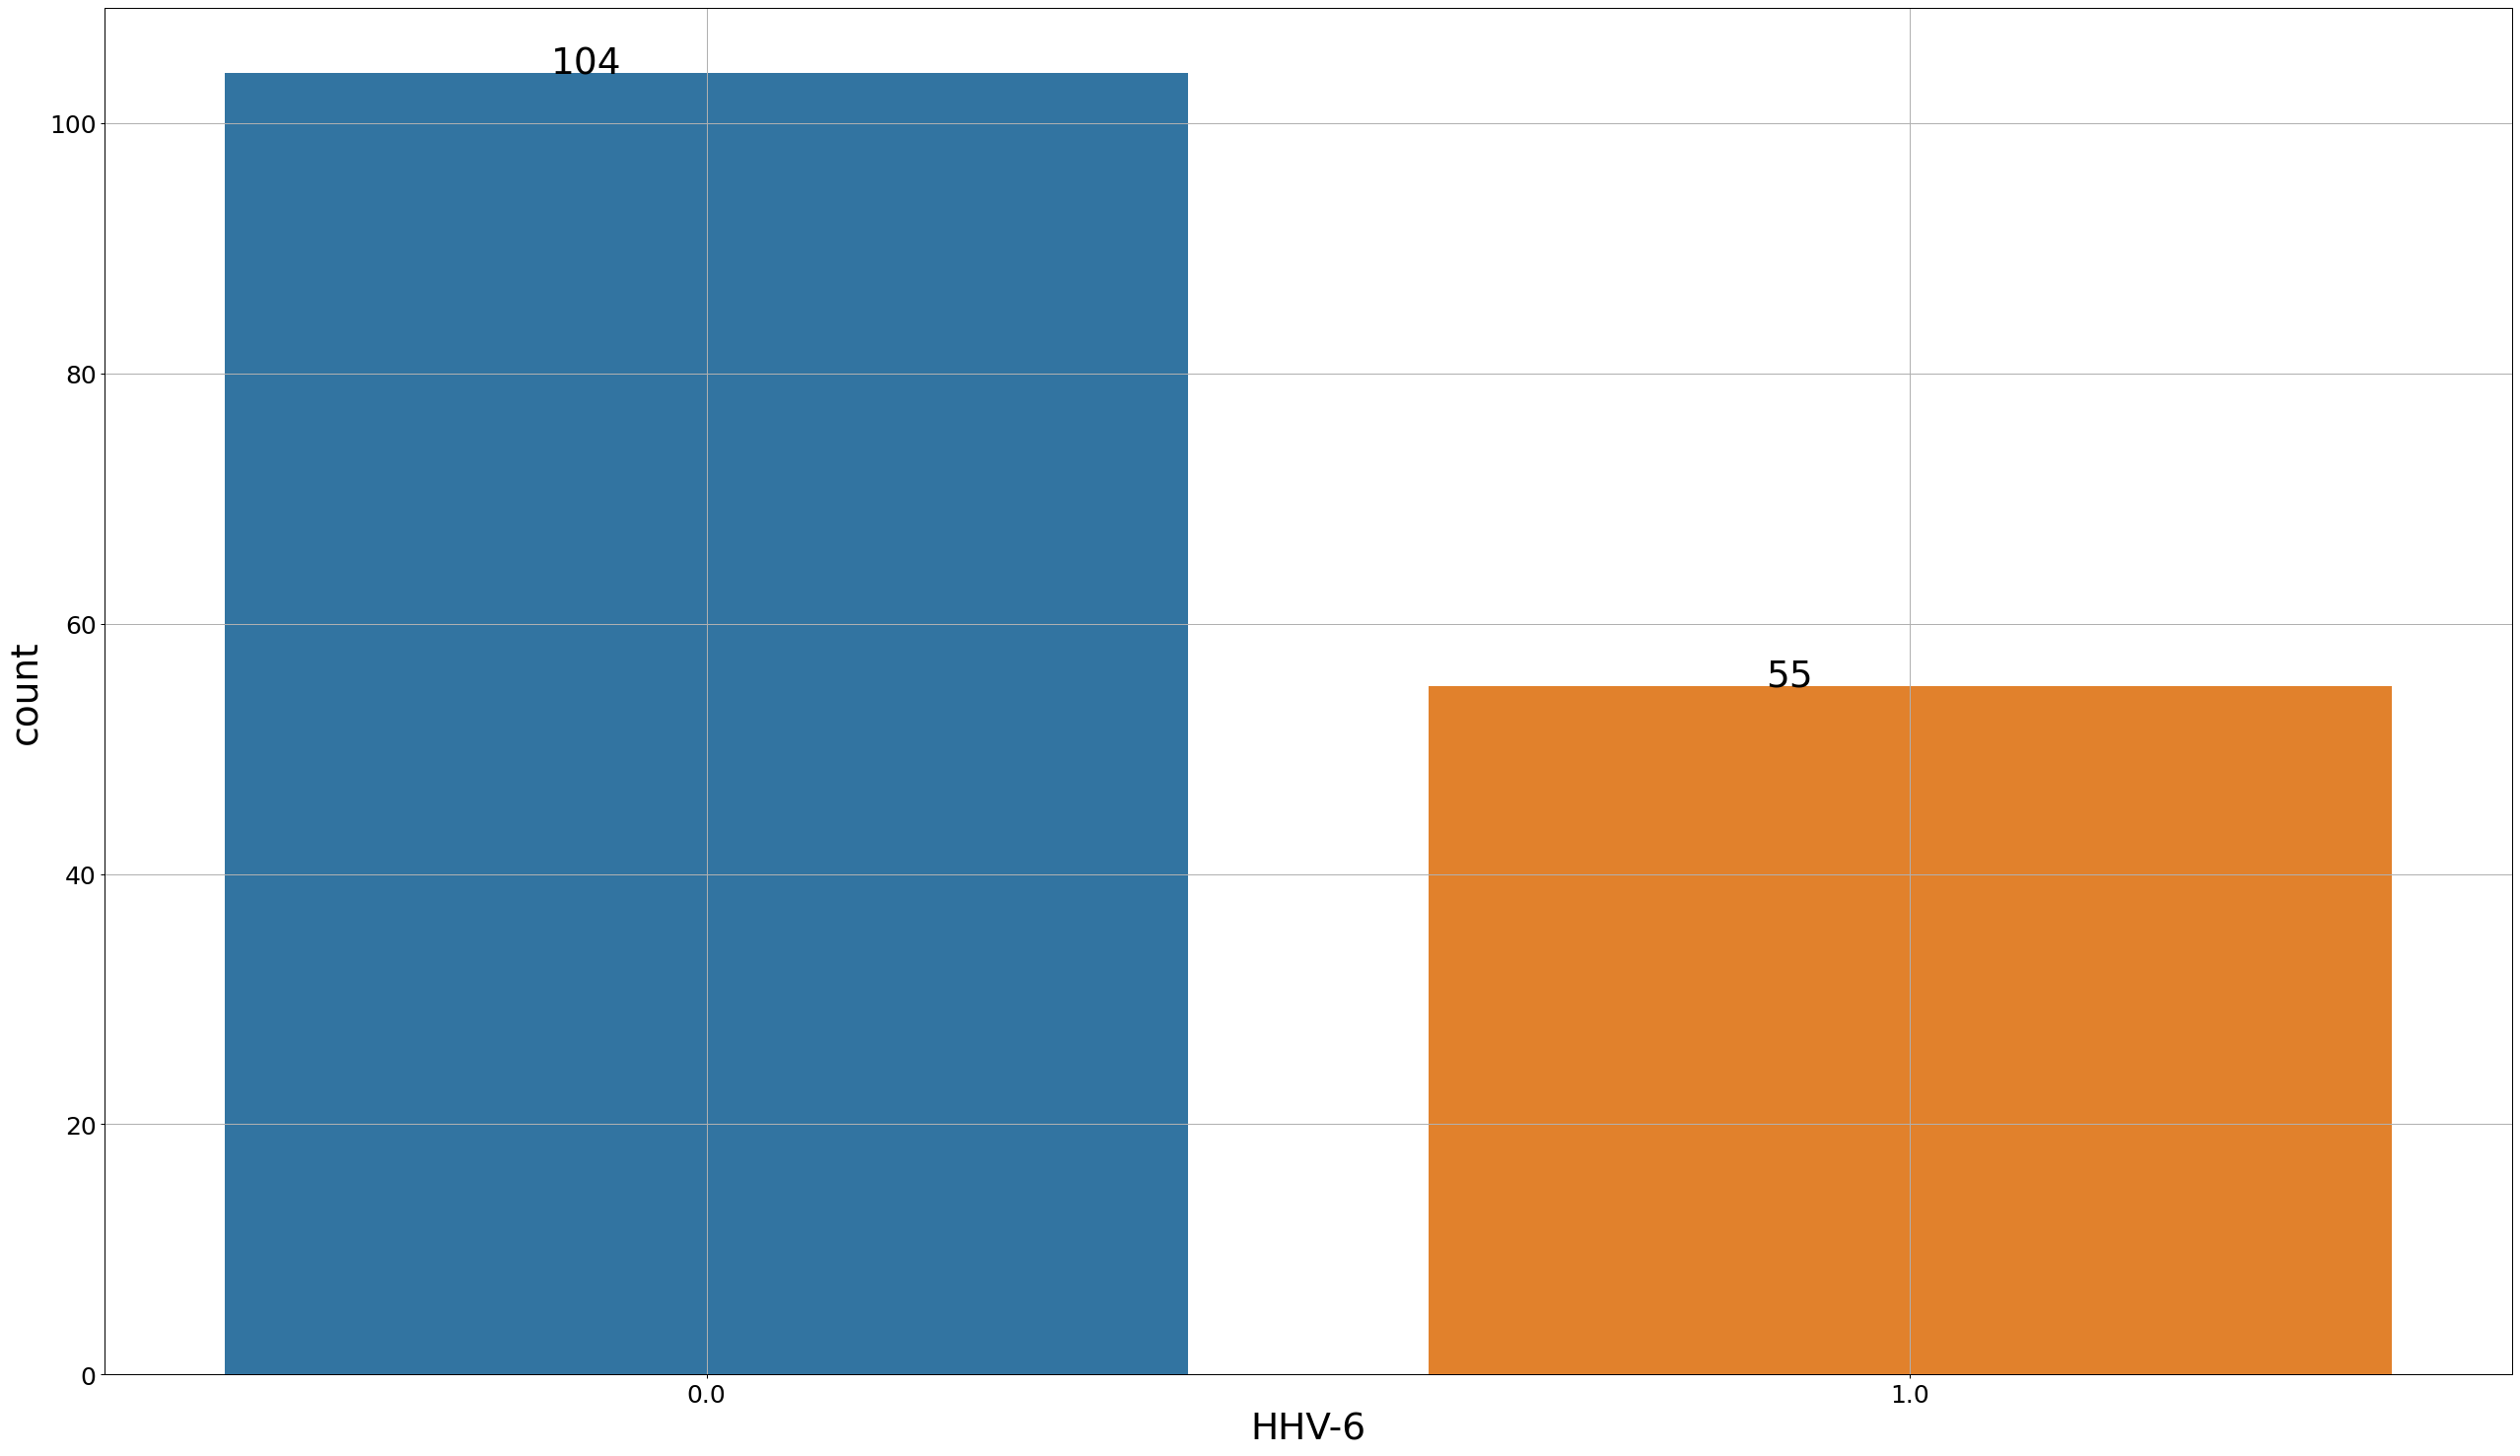

In [61]:
plt.figure(figsize=(35,20),dpi=90)
ax=sns.countplot(x="HHV-6",data=df) #hue="target"
plt.xlabel("HHV-6",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()), ha='center', fontsize=30)

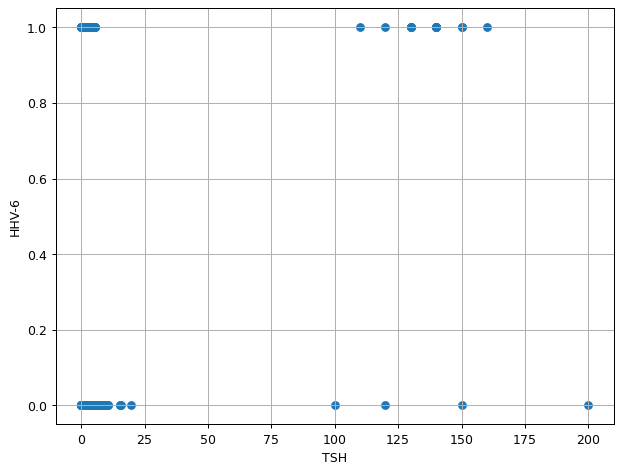

In [62]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("TSH")
plt.ylabel("HHV-6")
plt.scatter(x=df['TSH'] ,y=df['HHV-6'])
plt.grid()

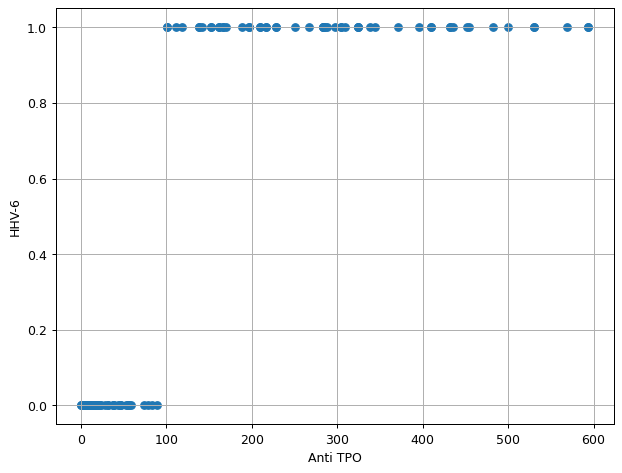

In [63]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("Anti TPO")
plt.ylabel("HHV-6")
plt.scatter(x=df['Anti TPO'] ,y=df['HHV-6'])
plt.grid()

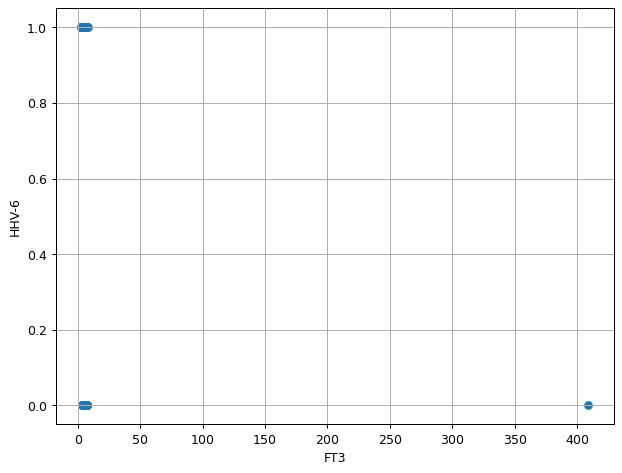

In [64]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("FT3")
plt.ylabel("HHV-6")
plt.scatter(x=df['FT3'] ,y=df['HHV-6'])
plt.grid()

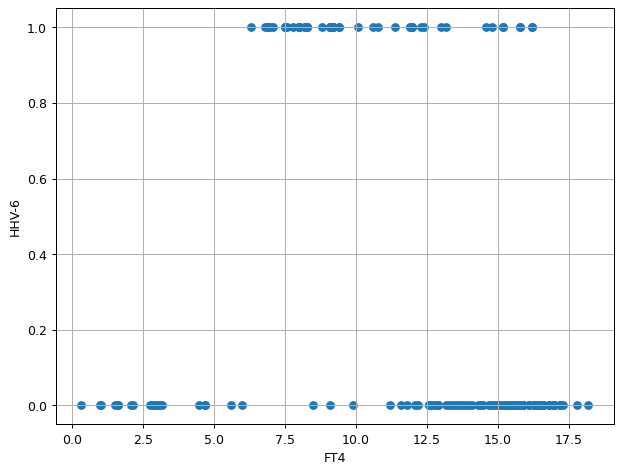

In [65]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("FT4")
plt.ylabel("HHV-6")
plt.scatter(x=df['FT4'] ,y=df['HHV-6'])
plt.grid()

TSH
---

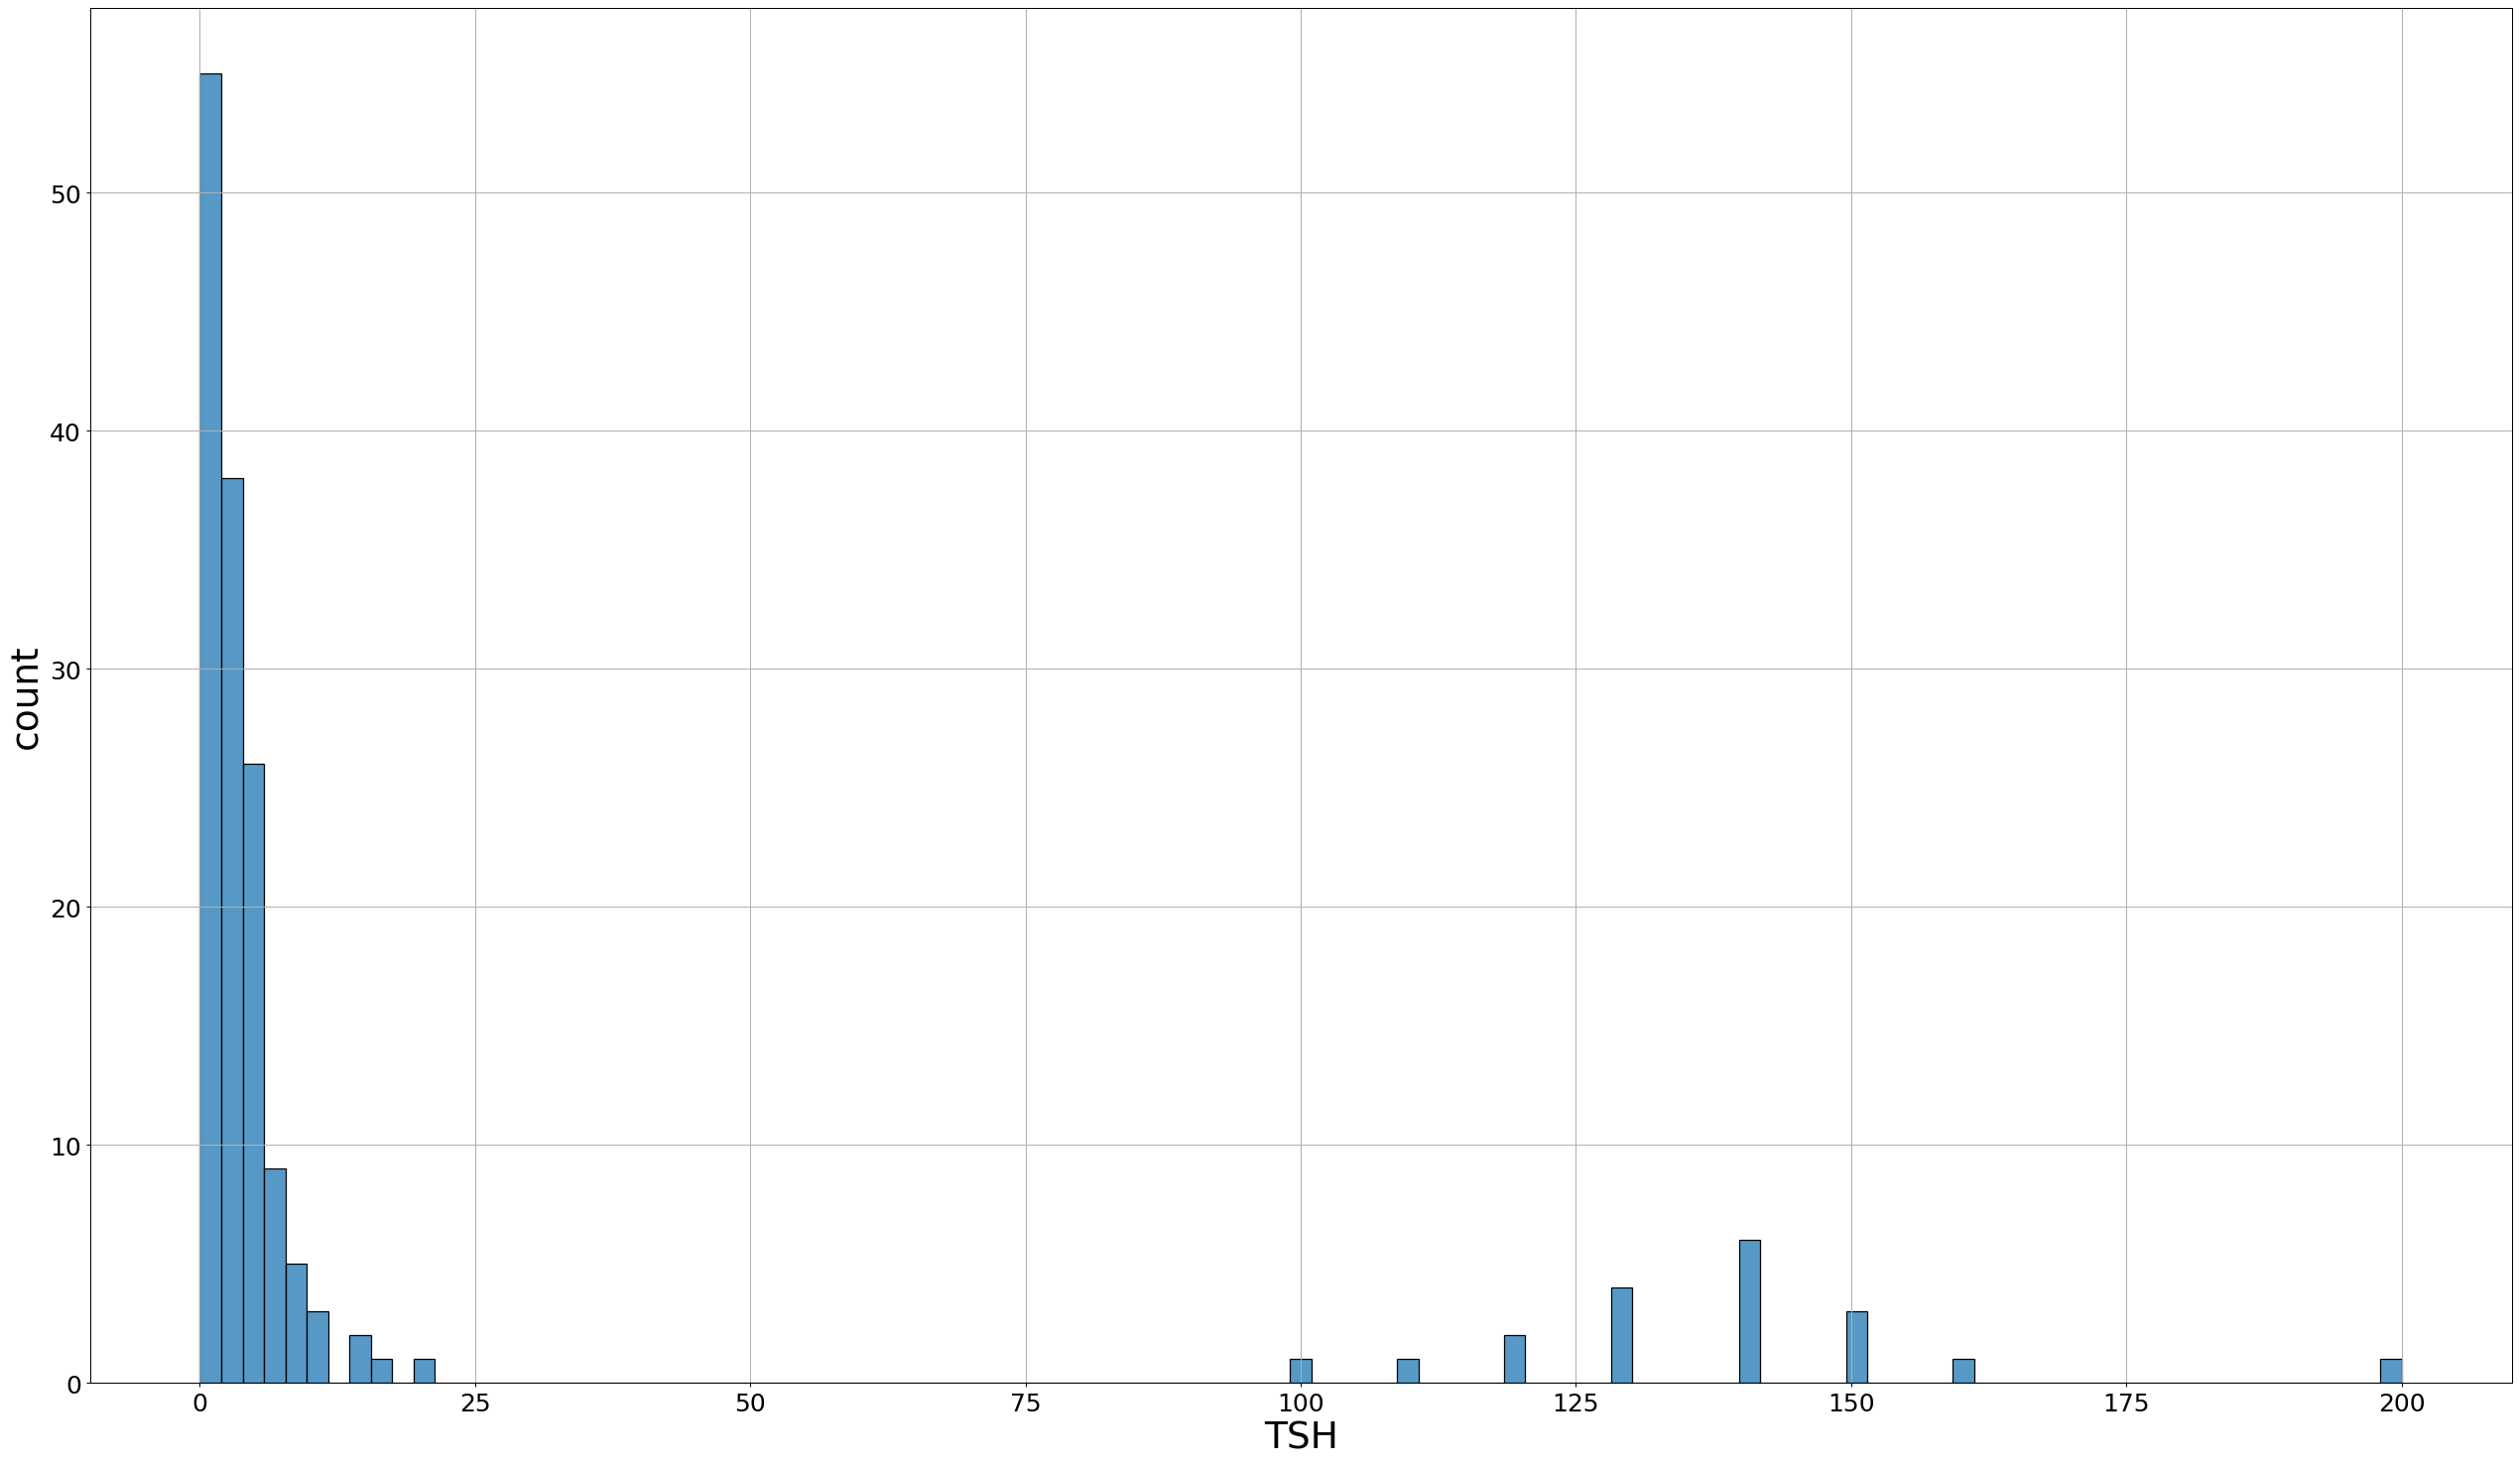

In [66]:
plt.figure(figsize=(35,20),dpi=90)

sns.histplot(x="TSH",data=df)

plt.xlabel("TSH",fontsize=30)
plt.ylabel("count",fontsize=30,)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

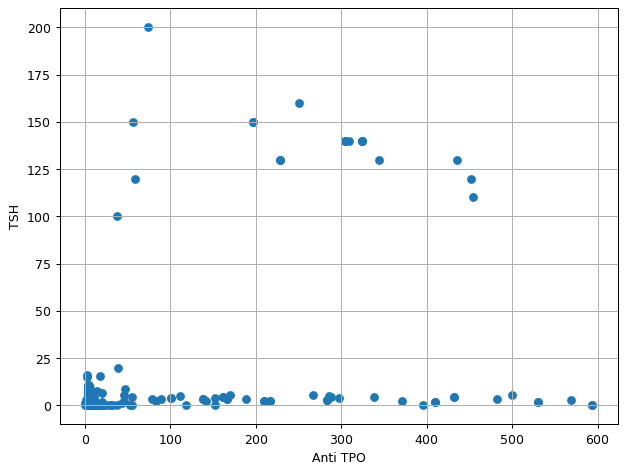

In [67]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("Anti TPO")
plt.ylabel("TSH")
plt.scatter(x=df['Anti TPO'] ,y=df['TSH'])
plt.grid()

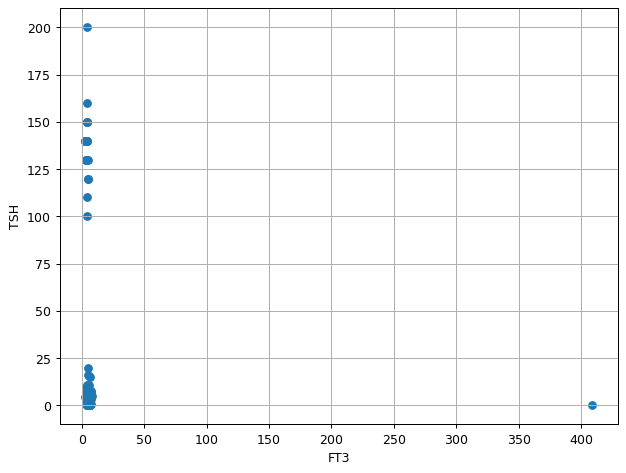

In [68]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("FT3")
plt.ylabel("TSH")
plt.scatter(x=df['FT3'] ,y=df['TSH'])
plt.grid()

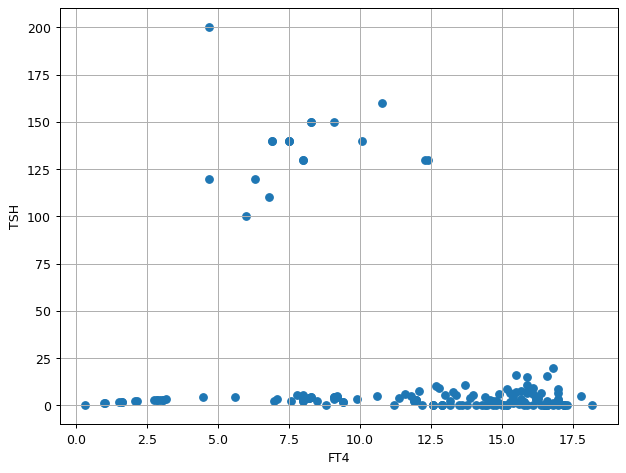

In [69]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("FT4")
plt.ylabel("TSH")
plt.scatter(x=df['FT4'] ,y=df['TSH'])
plt.grid()

FT3
--

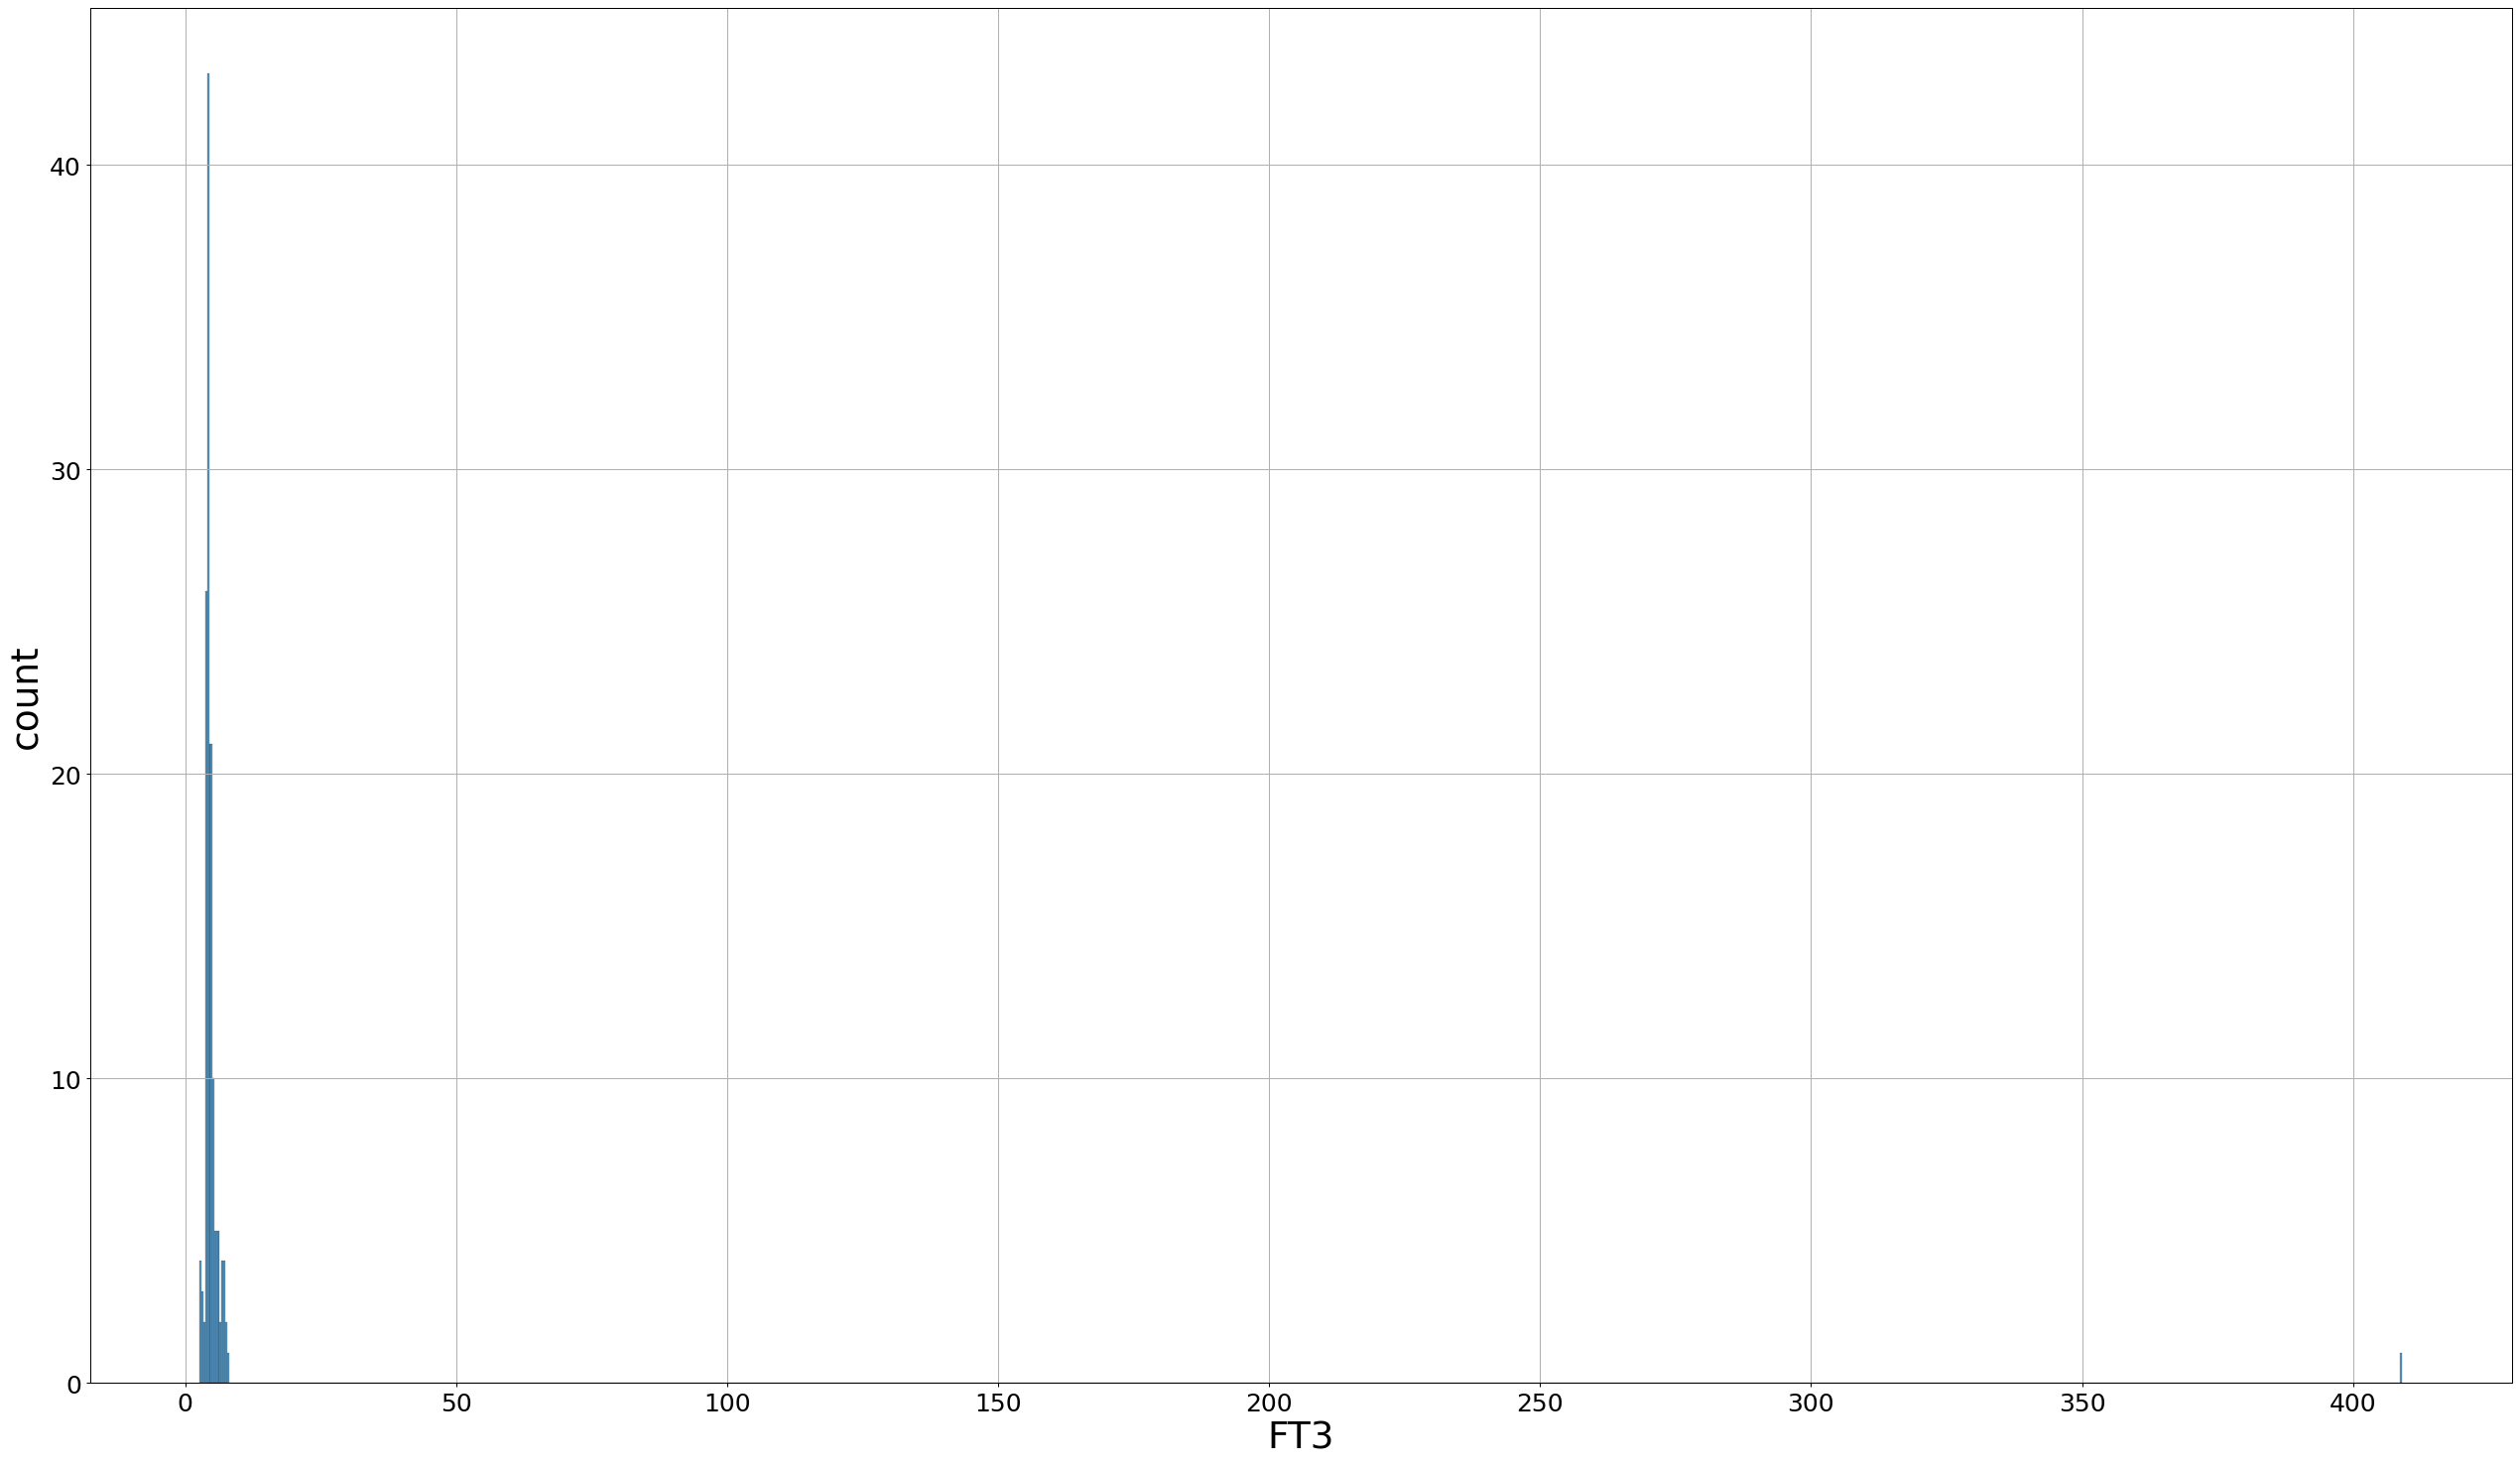

In [70]:
plt.figure(figsize=(35,20),dpi=90)

sns.histplot(x="FT3",data=df)

plt.xlabel("FT3",fontsize=30)
plt.ylabel("count",fontsize=30,)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

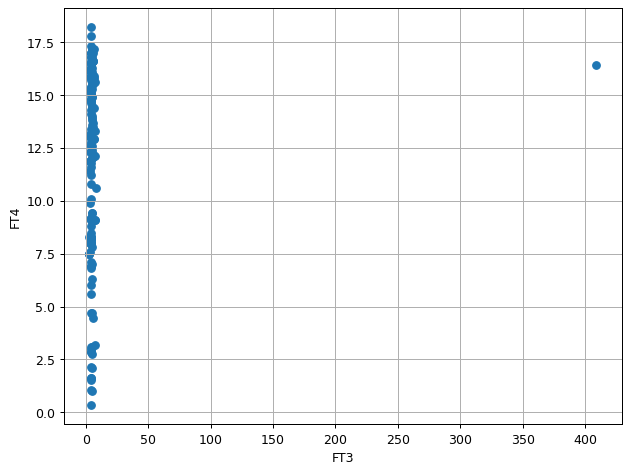

In [71]:
plt.figure(figsize=(8,6),dpi=90)
plt.xlabel("FT3")
plt.ylabel("FT4")
plt.scatter(x=df['FT3'] ,y=df['FT4'])
plt.grid()

Correlation analysis
----

<Axes: >

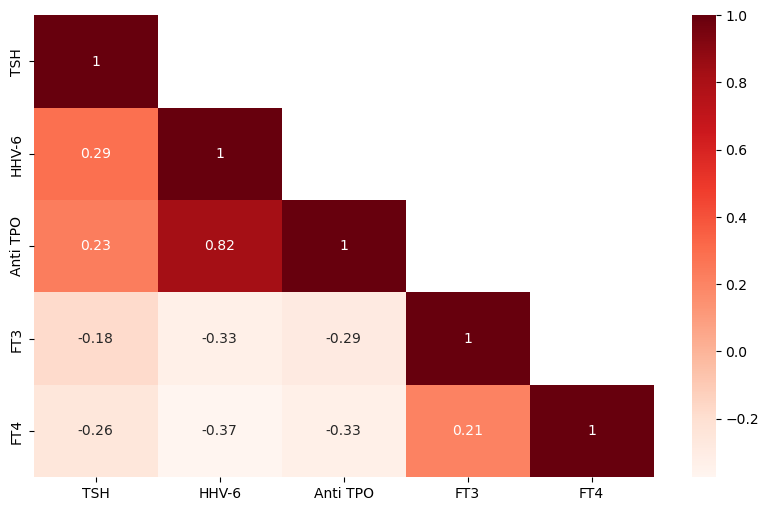

In [72]:
corr = df.corr(method="spearman")      #Pearson     #Kendall 
fig, ax = plt.subplots(figsize=(10, 6))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

sns.heatmap(corr, cmap="Reds" , mask=mask ,annot=True, ax=ax)

Outlier Treatment
----

In [73]:
df2=df[df['FT3']<300]

In [74]:
df2.describe()

,TSH,HHV-6,Anti TPO,FT3,FT4
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,19.493165,0.348101,113.032722,4.684177,11.700506
std,44.604527,0.477883,156.973901,0.978984,4.635922
min,0.010000,0.000000,0.300000,2.700000,0.330000
25%,0.957500,0.000000,4.800000,4.100000,8.200000
50%,3.075000,0.000000,18.800000,4.400000,12.900000
75%,5.975000,1.000000,194.250000,5.000000,15.700000
max,200.000000,1.000000,594.000000,7.900000,18.200000


<a id="required"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 5: Functions required for modeling</p>

⬆️[Tabel of Contents](#contents_tabel)

Evaluation metrics
---

In [75]:
def model_evaluation(clf, x_train, x_test, y_train, y_test, model_name):  
    sns.set(font_scale=1.2)

    print("-"*15,"Performace Model on Testset")
    print("-"*55)
    y_pred=clf.predict(x_test)
    print(classification_report(y_test,y_pred))
    "\n"
    print("-"*15,"Performace Model on Trainset")
    print("-"*55)
    y_pred_train=clf.predict(x_train)
    print(classification_report(y_train,y_pred_train))
  
  # Create figure and subplots  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), dpi=100)
  
  # Confusion Matrix (remains unchanged)
    cm = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, colorbar=False, cmap='YlOrBr', ax=ax1)
    cm.im_.set_cmap('YlOrBr')  # Set colormap
    cm.ax_.set_title('Confusion Matrix for Test Data')
    cm.ax_.grid(False)
  
  # Get unique class labels
    class_labels = unique_labels(y_test)
  
  # Plot ROC curve for each class
    for (i, class_label) in enumerate(class_labels):
        fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:, i], pos_label=class_label)
        auc_score = auc(fpr, tpr)
    
    # Customize plot for each class
        label = f'ROC Curve (Class {class_label}, AUC = {auc_score:.2f})'
        ax2.plot(fpr, tpr, label=label)
  
  # Set axis labels and title
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curves for Test Data')
    ax2.legend()
  
  # Report results (remains unchanged)
  # ... (your existing code for result calculation and table display)
  
    plt.tight_layout()
    plt.show()

Cross_validation
---

In [76]:
def cross_validation(model,x_train,y_train):
    score = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    model_score = score.mean()
    model_stdev = np.std(score)

    print('Cross Validation Accuracy are:\n {}'.format(score))
    accuracy  = ['Cross Validation Accuracy ']
    DF_C = pd.DataFrame({'CV Mean':model_score,'Std':model_stdev},index=accuracy )
    return DF_C

Tune_hyperparameters
---

In [77]:
def Tune_hyperparameters(clf, param_grid, x_train, y_train):
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
        clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        
        start_time = time.time()
    
        clf_grid.fit(x_train, y_train)
        
        end_time = time.time()
    
        print("Best hyperparameters with grid search:\n", clf_grid.best_params_ , "\nTime:", int(end_time - start_time), "Seconds")
    
        return clf_grid.best_estimator_

<a id="Tree"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 6: Decision Tree Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

In [78]:
x=df2.drop("HHV-6",axis=1)
y=df2["HHV-6"]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [80]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 6),
              'min_samples_leaf': np.arange(1, 6)
} 

In [81]:
DTS_Model=DecisionTreeClassifier(max_features=None ,random_state=0)

DTS_grid = Tune_hyperparameters(DTS_Model, param_grid, x_train, y_train)

Best hyperparameters with grid search:
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1} 
Time: 5 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



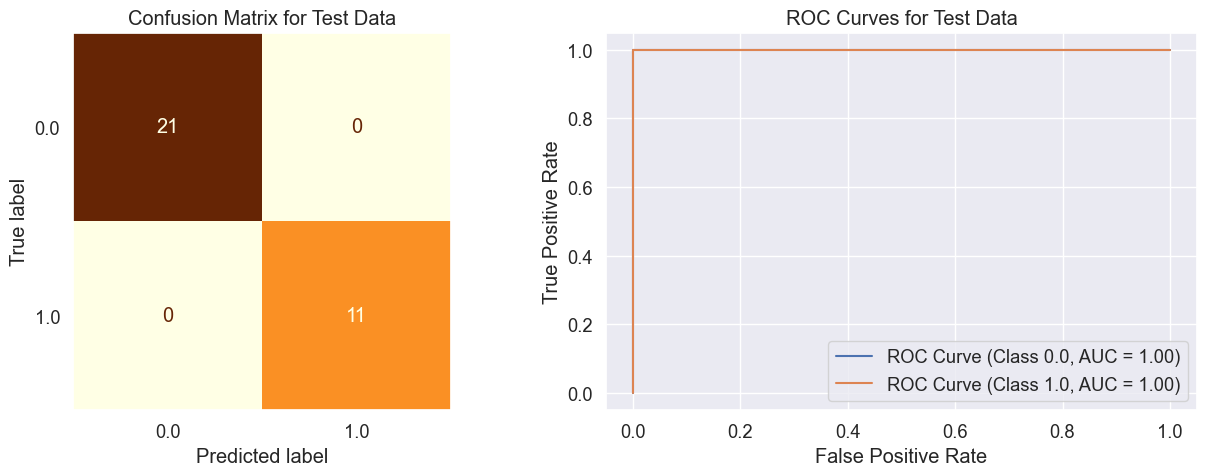

In [82]:
model_evaluation(DTS_grid,x_train,x_test,y_train,y_test,'DTS')

In [83]:
cross_validation(DTS_grid,x,y)

Cross Validation Accuracy are:
 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.86666667]


,CV Mean,Std
Cross Validation Accuracy,0.986667,0.04


<a id="KNN"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 7: KNN Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

In [84]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert training and test sets from numpy array to pandas dataframes
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [85]:
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'],'p': [1,2,3], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [1,2,3], 'weights': ['uniform']}]

In [86]:
KNN_Model = KNeighborsClassifier()

KNN_grid = Tune_hyperparameters(KNN_Model, param_grid, x_train, y_train)

Best hyperparameters with grid search:
 {'metric': 'minkowski', 'n_neighbors': 2, 'p': 3, 'weights': 'uniform'} 
Time: 0 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        82
         1.0       1.00      0.98      0.99        44

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



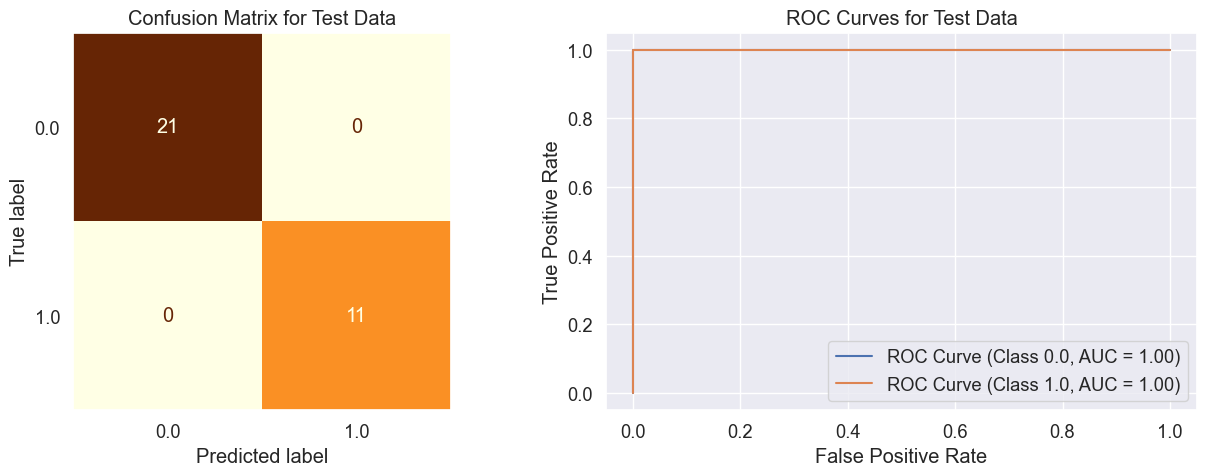

In [87]:
model_evaluation(KNN_grid,x_train,x_test,y_train,y_test,'KNN')

In [88]:
cross_validation(KNN_grid,x,y)

Cross Validation Accuracy are:
 [1.         1.         1.         0.875      1.         1.
 1.         1.         1.         0.86666667]


,CV Mean,Std
Cross Validation Accuracy,0.974167,0.0517


<a id="rf"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 8: Random Forest Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

In [89]:
x=df2.drop("HHV-6",axis=1)
y=df2["HHV-6"]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [91]:
# Define the hyperparameter grid to search
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
    "n_estimators": [5,6,7,8,9],
    "max_depth": [1,2,3],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2]
}


In [92]:
RF_Model = RandomForestClassifier(max_features='auto', random_state=0)

RF_grid = Tune_hyperparameters(RF_Model, param_grid, x_train, y_train)

Best hyperparameters with grid search:
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 7} 
Time: 1 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



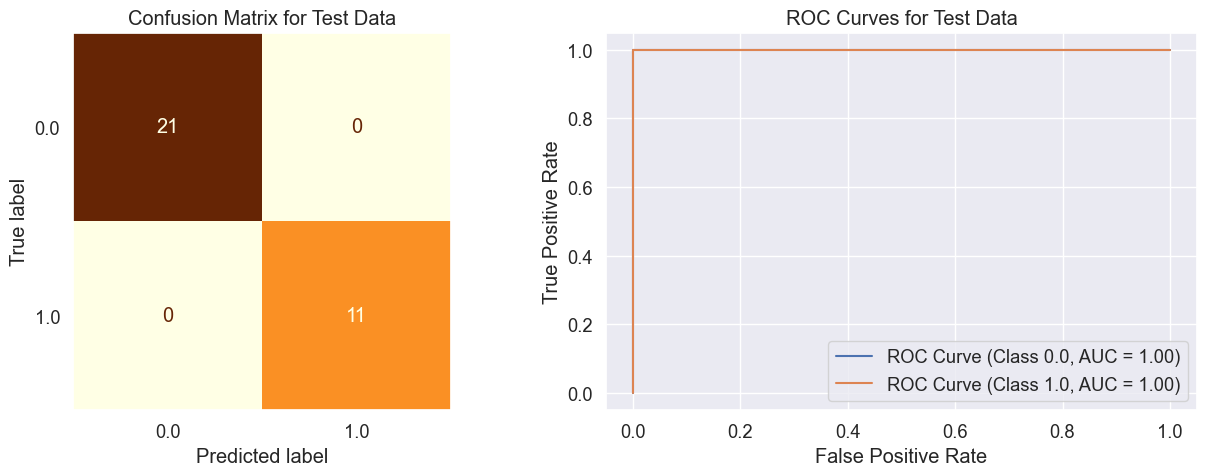

In [93]:
model_evaluation(RF_grid,x_train,x_test,y_train,y_test,'Random Forest')

In [94]:
cross_validation(RF_grid,x,y)

Cross Validation Accuracy are:
 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.86666667]


,CV Mean,Std
Cross Validation Accuracy,0.986667,0.04


<a id="svm"></a>
# <p style="background-color:#e6cfac; font-family:calibri; font-size:130%; color:#524712; text-align:center; border-radius:40px 50px; padding:10px">Step 9: SVM Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

In [95]:
x=df2.drop("HHV-6",axis=1)
y=df2["HHV-6"]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [97]:
SVM_Model = SVC(random_state=0,probability=True,kernel='linear')
SVM_Model.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=0)

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



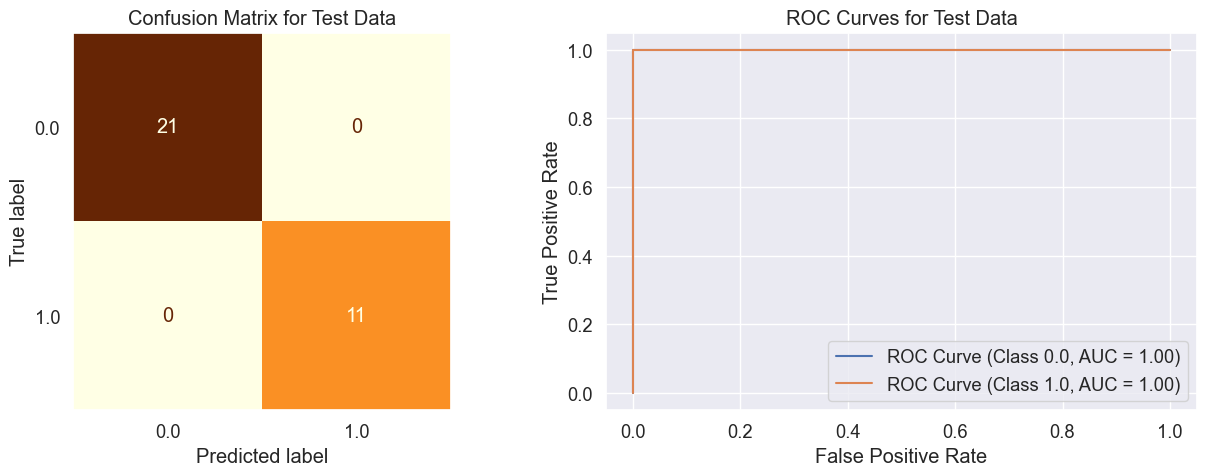

In [98]:
model_evaluation(SVM_Model,x_train,x_test,y_train,y_test,'SVM_Model')

In [99]:
cross_validation(SVM_Model,x,y)

Cross Validation Accuracy are:
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  0.8]


,CV Mean,Std
Cross Validation Accuracy,0.98,0.06


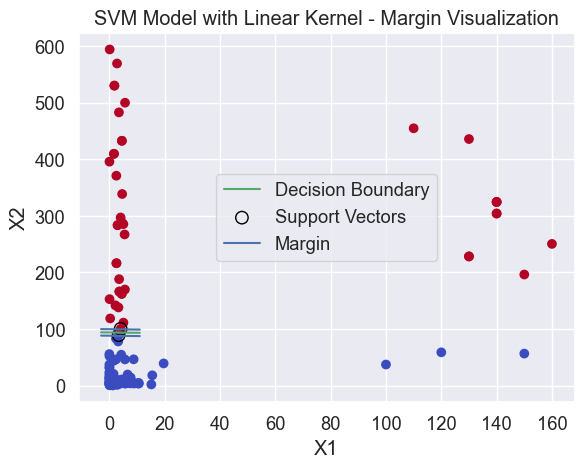

In [102]:
X=x_train
y=y_train
X=np.array(X)
y=np.array(y)
clf=SVM_Model
w = clf.coef_[0]
b = clf.intercept_[0]
def decision_boundary(x):
  return (-w[0] * x - b) / w[1]

# Generate data points for plotting the decision boundary
xx = np.linspace(-3, 11)
yy = decision_boundary(xx)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot the decision boundary
plt.plot(xx, yy, '-g', label='Decision Boundary')

# Get the support vectors
support_vectors = clf.support_vectors_

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, linewidth=1, facecolors='none', edgecolors='black', label='Support Vectors')

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Calculate parallel lines to the decision boundary at the margin distance
parallel1 = decision_boundary(xx) + margin
parallel2 = decision_boundary(xx) - margin

# Plot the parallel lines for the margin
plt.plot(xx, parallel1, '-b', label='Margin')
plt.plot(xx, parallel2, '-b')

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Model with Linear Kernel - Margin Visualization')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #e6cfac; font-size:110%; text-align:left">

* **Thank you for taking the time to consider this matter**
* The programmer of this project: **Amir Salmasi**
* Client: **Sara Mohammadi**

<h2 align="left"><font color=#524712>Best Regards🙏</font></h2>